In [1]:
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Analysis of the dataset

In [40]:
df = pd.read_csv('./insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Getting info about the dataset
def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

In [5]:
get_info_dataframe(df)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

DATAFRAME MISSING INFO - 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

DATAFRAME SHAPE INFO - 

(1338, 7)


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Total Columns : 7
Total Numerical Columns : 4
Total Categorical Columns : 3


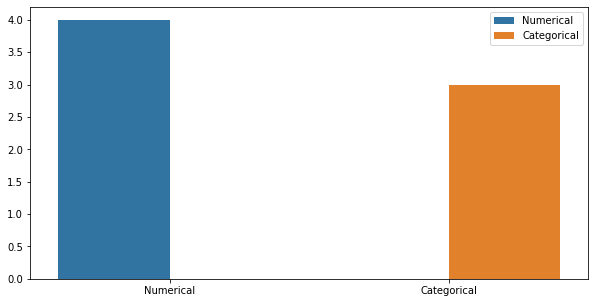

In [7]:
def get_col_type_representation(df):
    num_cols = df._get_numeric_data().columns
    cat_cols = set(df.columns)-set(num_cols)
    cat_list = ['Numerical','Categorical']
    count_list = [len(num_cols),len(cat_cols)]
    plt.figure(figsize=(10,5))
    print("Total Columns : {total}".format(total=len(df.columns)))
    print("Total Numerical Columns : {numerical}".format(numerical=len(num_cols)))
    print("Total Categorical Columns : {categorical}".format(categorical=len(cat_cols)))
    sns.barplot(x=cat_list,y=count_list,hue = cat_list)
get_col_type_representation(df)

In [8]:
# Fucntion to get the percentage of missing values
def get_percentage_of_missing_values(dataframe):
    col_list = dataframe.columns
    my_dict = {}
    total_null = 0
    for i in range(len(col_list)):
        total_null += dataframe[col_list[i]].isnull().sum()
    if(total_null == 0):
        return "No Missing Values Found"
    for i in range(len(col_list)):
        curr_null = dataframe[col_list[i]].isnull().sum()
        my_dict[col_list[i]] = (curr_null/total_null) * 100
    for i,(k,v) in enumerate(my_dict.items()):
        if(v > 0):
            print("Missing % value of {col_name} is : {val:.2f} ".format(col_name=k,val=v))
    plt.figure(figsize=(14,10))
    plt.xticks(rotation=45)
    sns.barplot(x = list(my_dict.keys()),y = list(my_dict.values()),hue = list(my_dict.keys()))

get_percentage_of_missing_values(df)

'No Missing Values Found'

In [9]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
zero_count = 0
one_count = 0
two_count = 0
three_count = 0
four_count = 0
five_count = 0

In [11]:
children_list = list(df['children'])
for i in range(len(children_list)):
    if children_list[i] == 0:
        zero_count+=1
    elif children_list[i] == 1:
        one_count+=1
    elif children_list[i] == 2:
        two_count+=1
    elif children_list[i] == 3:
        three_count+=1
    elif children_list[i] == 4:
        four_count+=1
    elif children_list[i] == 5:
        five_count+=1

Text(0, 0.5, 'Count')

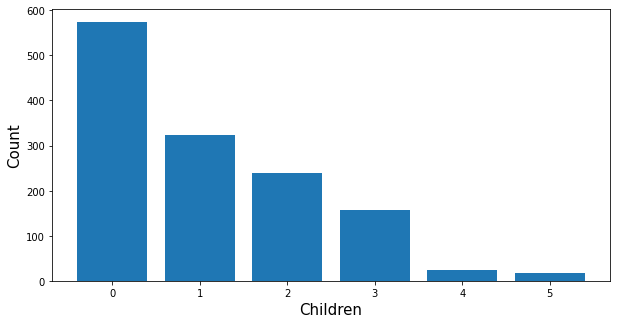

In [12]:
fig = plt.figure(figsize=(10,5))
children_cat = ['0', '1', '2','3','4','5']
children_count = [zero_count,one_count,two_count,three_count,four_count,five_count]
plt.bar(children_cat,children_count)
plt.xlabel('Children',size=15)
plt.ylabel('Count',size=15)

<AxesSubplot:>

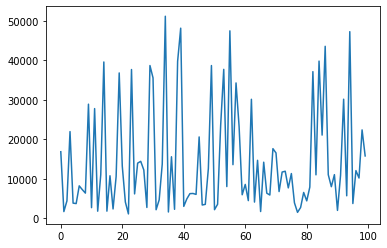

In [46]:
# first 100 values
df['charges'][:100].plot()

In [48]:
df['charges'][:100].mean()

14587.9216225

<AxesSubplot:>

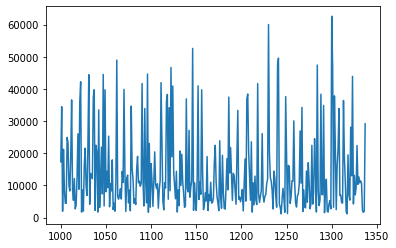

In [47]:
# Last 338 values
df['charges'][1000:].plot()

In [49]:
df['charges'][1000:].mean()

13846.358306094677

<AxesSubplot:>

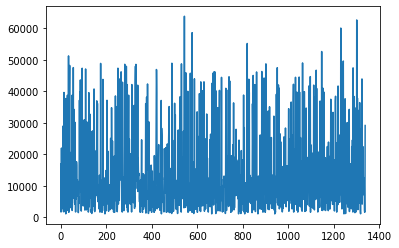

In [45]:
# All values
df['charges'].plot()

In [50]:
df['charges'].mean()

13270.422265141257

<AxesSubplot:xlabel='smoker', ylabel='count'>

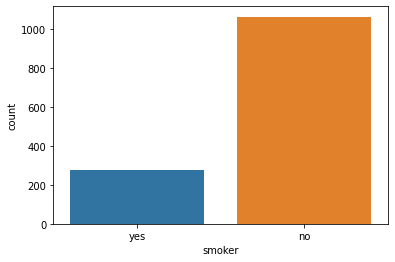

In [13]:
sns.countplot(x = 'smoker',data = df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

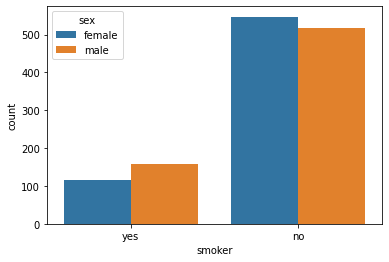

In [14]:
sns.countplot(x = 'smoker',data = df,hue='sex')

<AxesSubplot:xlabel='smoker', ylabel='count'>

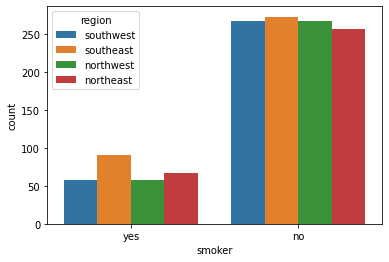

In [15]:
sns.countplot(x = 'smoker',data = df,hue='region')

<AxesSubplot:xlabel='region', ylabel='count'>

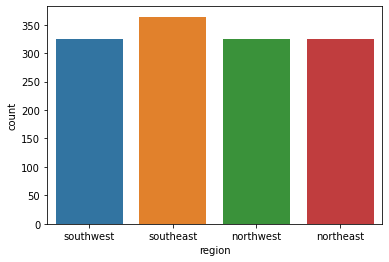

In [16]:
sns.countplot(x = 'region',data = df)

<AxesSubplot:xlabel='region', ylabel='count'>

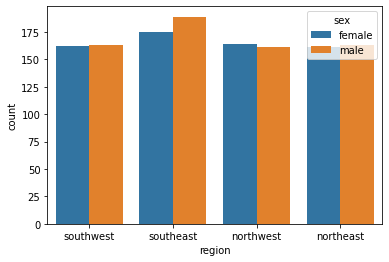

In [17]:
sns.countplot(x = 'region',data = df, hue='sex')

<AxesSubplot:xlabel='region', ylabel='count'>

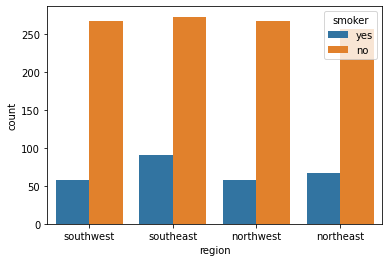

In [18]:
sns.countplot(x = 'region',data = df, hue='smoker')

<AxesSubplot:xlabel='sex', ylabel='count'>

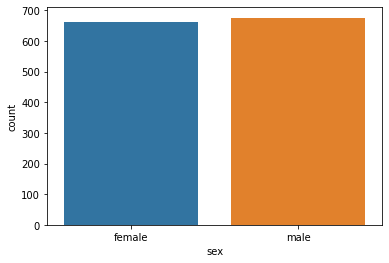

In [19]:
sns.countplot(x = 'sex',data = df)

<AxesSubplot:xlabel='sex', ylabel='count'>

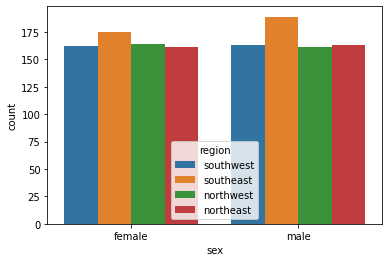

In [20]:
sns.countplot(x = 'sex',data = df,hue='region')

## Loading the dataset in PySpark

In [21]:
spark = SparkSession.builder.appName('Question2_pyspark').getOrCreate()
df = spark.read.csv('insurance.csv', header=True, inferSchema=True)

In [22]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



In [23]:
df.describe().show()

+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|summary|               age|   sex|               bmi|         children|smoker|   region|           charges|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|  count|              1338|  1338|              1338|             1338|  1338|     1338|              1338|
|   mean| 39.20702541106129|  null|30.663396860986538|  1.0949177877429|  null|     null|13270.422265141257|
| stddev|14.049960379216147|  null| 6.098186911679012|1.205492739781914|  null|     null|12110.011236693992|
|    min|                18|female|             15.96|                0|    no|northeast|         1121.8739|
|    max|                64|  male|             53.13|                5|   yes|southwest|       63770.42801|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+



## Doing some more analysis

+------+-----+
|smoker|count|
+------+-----+
|    no| 1064|
|   yes|  274|
+------+-----+



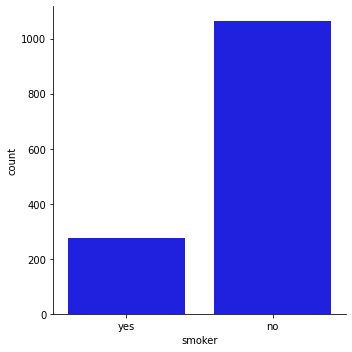

In [24]:
df.groupby('smoker').count().show()
dx = df.toPandas()
sns.catplot(x='smoker', kind='count', data=dx,color = 'blue')

+--------+-----+
|children|count|
+--------+-----+
|       1|  324|
|       3|  157|
|       5|   18|
|       4|   25|
|       2|  240|
|       0|  574|
+--------+-----+



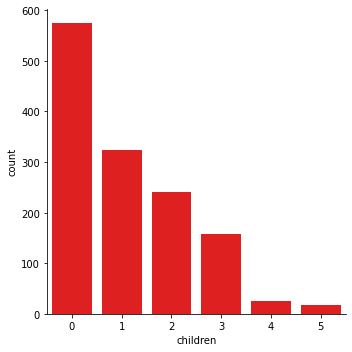

In [25]:
df.groupby('children').count().show()
sns.catplot(x='children', kind='count', data=dx,color = 'red')

BMI less than 25: 247
BMI greater than 25: 1091


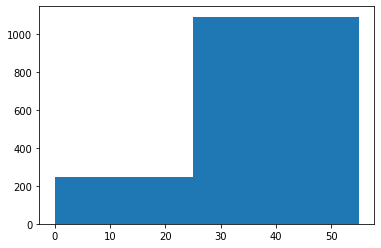

In [26]:
lt=0
mt=0
for i in dx['bmi']:
    if (i<=25):
        lt+=1
    else:
        mt+=1
print('BMI less than 25:', lt)
print('BMI greater than 25:', mt)
plt.hist(dx.bmi, bins=[0,25,55])
plt.show()

Text(0.5, 1.0, 'Age Vs Charges')

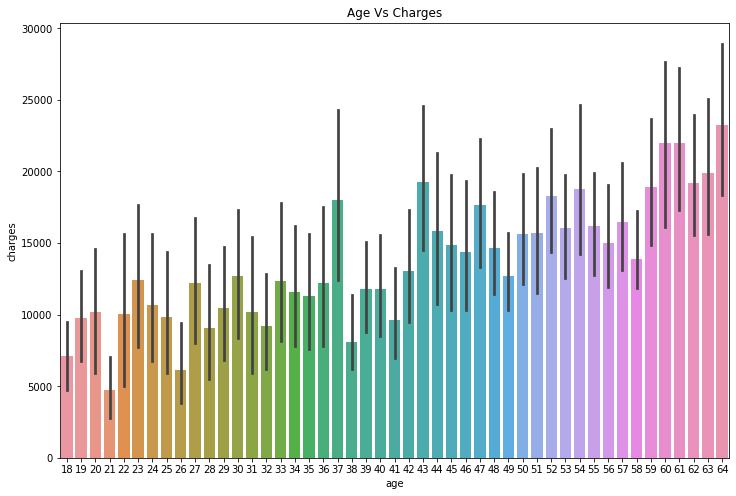

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x='age',y='charges', data=dx)
plt.title('Age Vs Charges')

Mean charges for 3 or less than 3 children: 11730.58237744186
Mean charges for more than 3 children: 13321.552083806178


Text(0.5, 1.0, 'No. of Children Vs Charges')

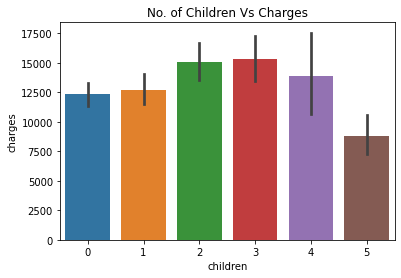

In [28]:
mean_chl,mean_chm = dx['charges'][dx['children'] > 3].mean(), dx['charges'][dx['children'] <= 3].mean()
print("Mean charges for 3 or less than 3 children:",mean_chl)
print("Mean charges for more than 3 children:",mean_chm)
sns.barplot(x='children',y='charges', data=dx)
plt.title('No. of Children Vs Charges')

In [29]:
cat_cols = [c[0] for c in df.dtypes if c[1]=='string']
cat_cols

['sex', 'smoker', 'region']

In [30]:
num_cols = [c[0] for c in df.dtypes if c[1]!='string']
num_cols = num_cols[0:3]
num_cols

['age', 'bmi', 'children']

In [31]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, StandardScaler
stages=[]
for cat_col in cat_cols:
    stringIndexer = StringIndexer(inputCol = cat_col, outputCol = cat_col + '_Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()],outputCols = [cat_col +'_OHE'])
    stages += [stringIndexer, encoder]
assemblerInputs = [c + '_OHE' for c in cat_cols] + num_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol='asv_features')
stages += [assembler]
ss = StandardScaler(inputCol='asv_features', outputCol='features')
stages += [ss]

## Creating Pipeline with PySpark

In [32]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df_pipetrans = pipelineModel.transform(df)
df_trans = df_pipetrans.select('features','charges')

In [33]:
df_trans = df_trans.withColumnRenamed('charges','label')

In [34]:
train_data, test_data = df_trans.randomSplit([0.7,0.3], seed = 101)

In [35]:
# Loading Our Machine Learning Package
from pyspark.ml.regression import LinearRegression
lm = LinearRegression(featuresCol='features',labelCol='label')
lm_model = lm.fit(train_data)

In [36]:
trainSummary=lm_model.summary
print(f"MAE:  {trainSummary.meanAbsoluteError}")
print(f"MSE:  {trainSummary.meanSquaredError}")
print(f"RMSE: {trainSummary.rootMeanSquaredError}")
print(f"R2:   {trainSummary.r2}")

MAE:  3974.81465517053
MSE:  35109646.621507734
RMSE: 5925.339367623405
R2:   0.7593443303513376


In [37]:
lm_predictions = lm_model.transform(test_data)
lm_predictions.select('features','prediction','label').show(5)

+--------------------+------------------+----------+
|            features|        prediction|     label|
+--------------------+------------------+----------+
|(8,[0,1,5,6],[1.9...|1109.5958605741998| 1705.6245|
|(8,[0,1,5,6],[1.9...|1623.4338093039714| 1708.0014|
|(8,[0,1,5,6],[1.9...| 4511.933713005428| 2254.7967|
|(8,[0,1,5,6],[1.9...|  2393.67669456345|2395.17155|
|(8,[0,1,5,6],[1.9...| 4922.695649288138| 2727.3951|
+--------------------+------------------+----------+
only showing top 5 rows



## Evaluating our model

In [38]:
from pyspark.ml.evaluation import RegressionEvaluator
lm_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on test data: ", lm_evaluator.evaluate(lm_predictions))

R Squared on test data:  0.7275960225639674


In [39]:
# Displaying metrics of the model over test data
res = lm_model.evaluate(test_data)
print(f"MAE: {res.meanAbsoluteError}")
print(f"MSE:  {res.meanSquaredError}")
print(f"RMSE:  {res.rootMeanSquaredError}")
print(f"R2: {res.r2}")

MAE: 4330.094432564454
MSE:  40261304.29225019
RMSE:  6345.179610716326
R2: 0.7275960225639674
